IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

LOADING DATASET

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

PCA

In [3]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

CLUSTERS

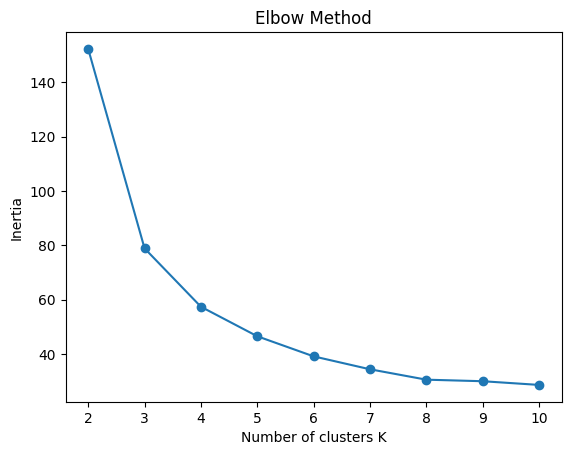

In [4]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df.iloc[:, :-2])
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

K-MEANS CLUSTER

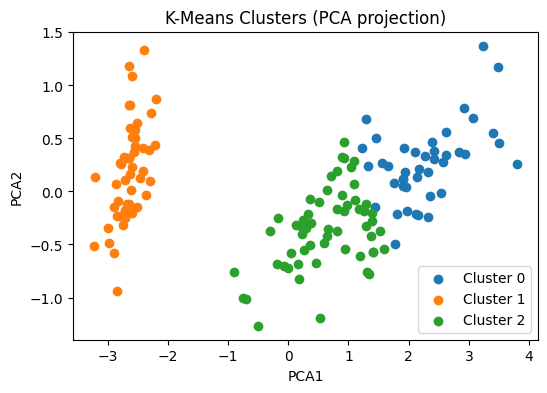

In [5]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.iloc[:, :-3])

# Step 6: Visualize clusters
plt.figure(figsize=(6, 4))
for cluster in range(k_optimal):
    plt.scatter(
        df[df['Cluster'] == cluster]['PCA1'],
        df[df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )
plt.legend()
plt.title('K-Means Clusters (PCA projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [6]:
score = silhouette_score(df.iloc[:, :-3], df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.542
